In [1]:
#2.extracting the data into dataframe
import pandas as pd
df_port=pd.read_csv('/content/drive/MyDrive/Data Sets/ElectionData.csv')
df_port.head()

TimeElapsed                 time  ... Hondt  FinalMandates
0            0  2019-10-06 20:10:02  ...    94            106
1            0  2019-10-06 20:10:02  ...    81             77
2            0  2019-10-06 20:10:02  ...    16             19
3            0  2019-10-06 20:10:02  ...    12              5
4            0  2019-10-06 20:10:02  ...    11             12

[5 rows x 28 columns]

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
#3.saving the data in json format
df_port.to_json("jsonfile",orient='columns')

In [4]:
#4,5 number of rows and columns in the dataset
size=df_port.shape
print("Number of rows : {}".format(size[0]))
print("Number of Columns : {}".format(size[1]))

Number of rows : 21643
Number of Columns : 28


In [5]:
#6
df_port.describe()

TimeElapsed  totalMandates  ...         Hondt  FinalMandates
count  21643.000000   21643.000000  ...  21643.000000   21643.000000
mean     133.146052      11.544795  ...      1.126138       1.126138
std       77.651193      31.314567  ...      6.293552       6.872644
min        0.000000       0.000000  ...      0.000000       0.000000
25%       65.000000       1.000000  ...      0.000000       0.000000
50%      135.000000       4.000000  ...      0.000000       0.000000
75%      200.000000       9.000000  ...      0.000000       0.000000
max      265.000000     226.000000  ...     94.000000     106.000000

[8 rows x 25 columns]

In [6]:
df_port['Party'].unique()

array(['PS', 'PPD/PSD', 'B.E.', 'CDS-PP', 'PCP-PEV', 'PAN', 'CH',
       'R.I.R.', 'PCTP/MRPP', 'A', 'L', 'IL', 'JPP', 'NC', 'PDR', 'PNR',
       'PURP', 'PPM', 'MPT', 'PTP', 'MAS'], dtype=object)

In [7]:
df_port.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21643 entries, 0 to 21642
Data columns (total 28 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   TimeElapsed               21643 non-null  int64  
 1   time                      21643 non-null  object 
 2   territoryName             21643 non-null  object 
 3   totalMandates             21643 non-null  int64  
 4   availableMandates         21643 non-null  int64  
 5   numParishes               21643 non-null  int64  
 6   numParishesApproved       21643 non-null  int64  
 7   blankVotes                21643 non-null  int64  
 8   blankVotesPercentage      21643 non-null  float64
 9   nullVotes                 21643 non-null  int64  
 10  nullVotesPercentage       21643 non-null  float64
 11  votersPercentage          21643 non-null  float64
 12  subscribedVoters          21643 non-null  int64  
 13  totalVoters               21643 non-null  int64  
 14  pre.bl

In [8]:
df_port.isnull().sum()

TimeElapsed                 0
time                        0
territoryName               0
totalMandates               0
availableMandates           0
numParishes                 0
numParishesApproved         0
blankVotes                  0
blankVotesPercentage        0
nullVotes                   0
nullVotesPercentage         0
votersPercentage            0
subscribedVoters            0
totalVoters                 0
pre.blankVotes              0
pre.blankVotesPercentage    0
pre.nullVotes               0
pre.nullVotesPercentage     0
pre.votersPercentage        0
pre.subscribedVoters        0
pre.totalVoters             0
Party                       0
Mandates                    0
Percentage                  0
validVotesPercentage        0
Votes                       0
Hondt                       0
FinalMandates               0
dtype: int64

In [9]:
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning) 

In [10]:
#7.i 
#scatter plot between the Number parishes approved and blankvotesb
import plotly.express as px
fig=px.scatter(df_port,x="numParishesApproved",y="blankVotes",color="territoryName")
fig.show()

From the above scatter plot we can observe that, By increasing the number of Parishes ,the number of Blank votes are getting increased. I mean in every district is the parishes are more, there is most likely to get Blank Votes.

In [11]:
import plotly.express as px
fig =px.pie(df_port,values='blankVotesPercentage',names='territoryName',title='Current election')
fig1 =px.pie(df_port,values='pre.blankVotesPercentage',names='territoryName',title='Previous election')
fig1.show()
fig.show()

Comparing from prevous election, the balnk votes recieved from every territory is almost same. We can only observe slight change.

In [12]:
#7.3
import plotly.express as px
fig = px.scatter(df_port, x="territoryName", y="FinalMandates", size="FinalMandates" ,color="Party")
fig.show()

From the chart, we can see territory territotio Nacional is the largest consituency. With majority of Party gaiing the votes. In that Party Ps Has power on the more number of distrcits with receveing more number of Mndates from every district.

In [13]:
#7.4
fig = px.bar(df_port, x='territoryName', y='FinalMandates',color='Party')
fig.show()

From the above , we can see territorio Nacional constiuency had largest consituency. Where large number of seats with Party ps and holding 106 Mp seats,party PPD/PSD with holding 77 Mp seats.

In [14]:
#histograme for blank votes percentage
fig=px.histogram(df_port,x="blankVotesPercentage")
fig.show()

Blank Votes Percentage is Normally distributed.

In [15]:
fig=px.histogram(df_port,x="Party")
fig.show()

In [16]:
fig=px.histogram(df_port,x="Percentage")
fig.show()

In [17]:
Latitude={ 'Aveiro':'40.64100311', 'Beja':'38.01400214', 'Braga':'41.55499453	', 'Bragança':'41.80799701',
       'Castelo Branco':'39.81099615', 'Coimbra':'40.20037437', 'Évora':'38.55999611', 'Faro':'37.13373985', 'Guarda':'40.54100414', 'Leiria':'39.73899603',
       'Lisboa':'38.52995953', 'Madeira':'32.64998252', 'Portalegre':'39.29000411', 'Porto':'41.15000633', 'Santarém':'39.23100008', 'Setúbal':'38.5260',
       'Viana do Castelo':'41.69623514', 'Vila Real':'41.29399815', 'Viseu':'40.65699611', 'Açores':'38.53465595'}

In [18]:
Longitude={'Aveiro':'-8.650997534', 'Beja':'-7.86300241', 'Braga':'-8.421331219', 'Bragança':'-6.755003426',
       'Castelo Branco':'-7.487999559', 'Coimbra':'-8.41668034', 'Évora':'-7.905995561', 'Faro':'-8.533314048', 'Guarda':'-7.262000512', 'Leiria':'-8.804996462',
       'Lisboa':'-8.900010011', 'Madeira':'-16.88003972', 'Portalegre':'-7.423001549', 'Porto':'-8.620001263', 'Santarém':'-8.682002552', 'Setúbal':'-8.8882',
       'Viana do Castelo':'-8.844137484', 'Vila Real':'-7.73700249', 'Viseu':'-7.910000431', 'Açores':'-28.64475681'} 

In [19]:
df_new = df_port[df_port['territoryName'] != 'Território Nacional']
df_new['Latitude']=df_new['territoryName'].map(Latitude)
df_new['Longitude']=df_new['territoryName'].map(Longitude)
df_new.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



TimeElapsed                 time  ...     Latitude     Longitude
21            0  2019-10-06 20:10:02  ...  40.64100311  -8.650997534
22            0  2019-10-06 20:10:02  ...  40.64100311  -8.650997534
23            0  2019-10-06 20:10:02  ...  40.64100311  -8.650997534
24            0  2019-10-06 20:10:02  ...  40.64100311  -8.650997534
25            0  2019-10-06 20:10:02  ...  40.64100311  -8.650997534

[5 rows x 30 columns]

In [20]:
# Maps party with their Mps on the Map.
fig = px.scatter_mapbox(df_new, lat="Latitude", lon="Longitude", hover_name="territoryName", hover_data=["Party", "FinalMandates"],
                        center=dict(lat=40.7621, lon=-8.1339), zoom=3, height=300)
fig.update_layout(mapbox_style="open-street-map")
fig.update_layout(margin={"r":0,"t":0,"l":0,"b":0})
fig.show()

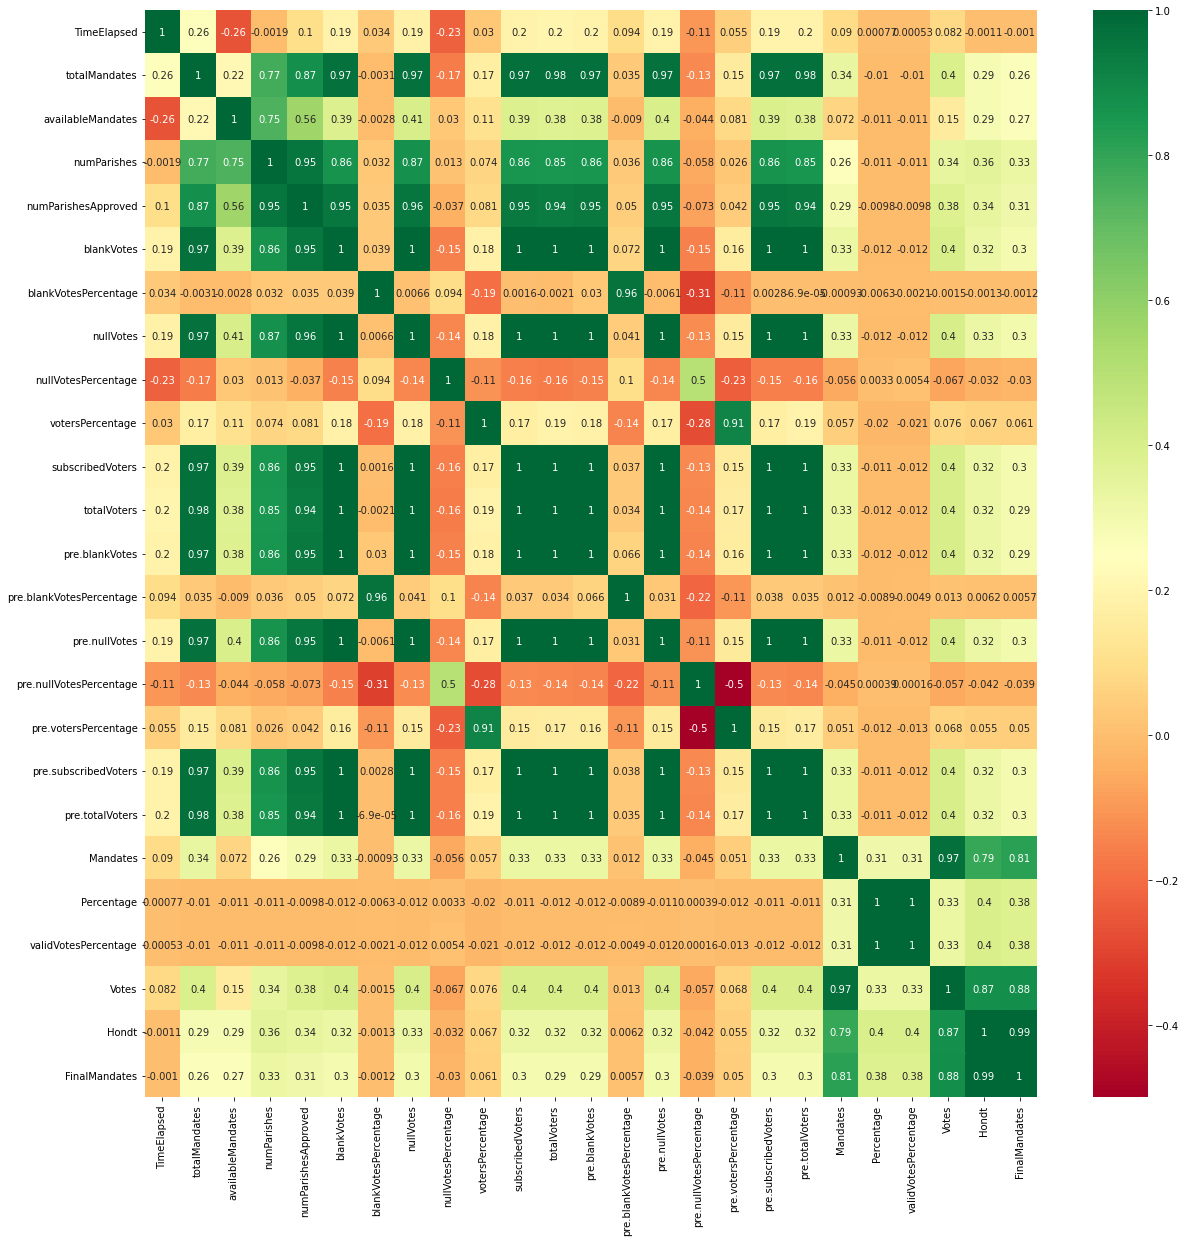

In [21]:
#8pearson corelation matrix of the data
import matplotlib.pyplot as plt
import seaborn as sns
pearsoncorr = df_port.corr(method='pearson')
features=pearsoncorr.index
plt.figure(figsize=(20,20))
g=sns.heatmap(df_port[features].corr(method='pearson'),annot=True,cmap='RdYlGn')

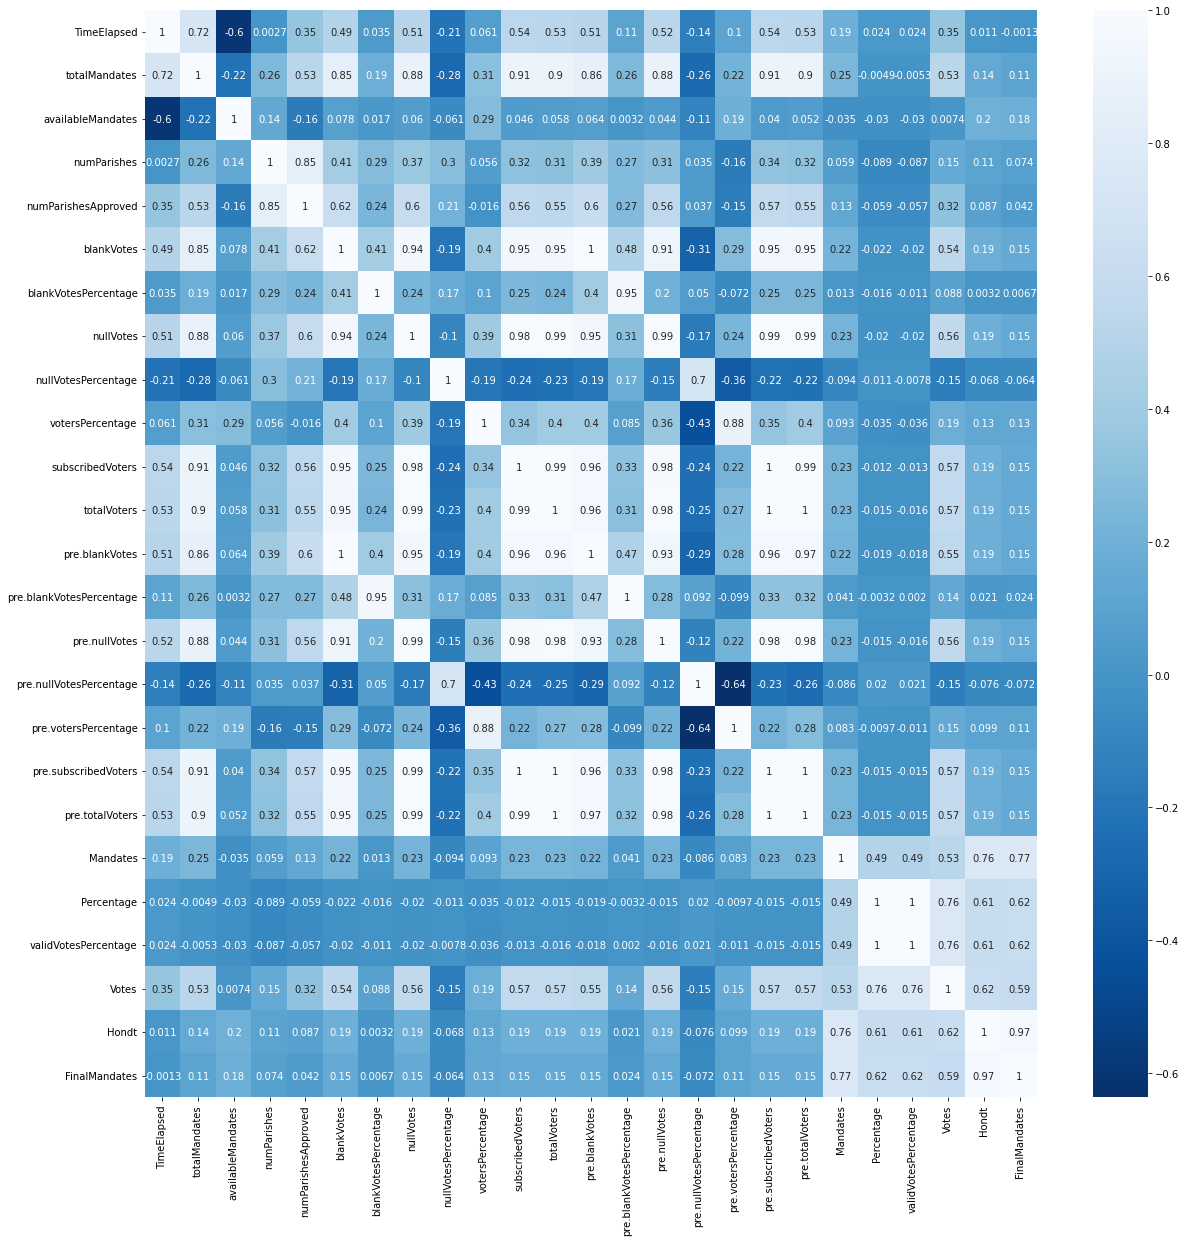

In [22]:
#spearman corelation matrix of the data
spearmancorr = df_port.corr(method='spearman')
features=spearmancorr.index
plt.figure(figsize=(20,20))
g=sns.heatmap(df_port[features].corr(method='spearman'),annot=True,cmap='Blues_r')

In [23]:
pip install geopandas

     |████████████████████████████████| 1.0 MB 5.4 MB/s 
     |████████████████████████████████| 6.3 MB 43.8 MB/s 
     |████████████████████████████████| 15.4 MB 39 kB/s 


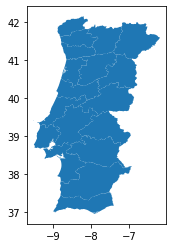

In [24]:
#Display Annotae graph using folium
import geopandas as gpd
df_geo=gpd.read_file('/content/drive/MyDrive/Data Sets/portugal-districts.json')
df_geo.plot()

In [25]:
df_geo.crs = "EPSG:4326" 

In [26]:
df_new=df_new[df_new['territoryName']!='Madeira']
df_new=df_new.rename(columns={'territoryName':'NAME_1'},index={'ONE':'ROW_1'})

In [27]:
from branca.element import Figure
import folium
from folium.plugins import TimeSliderChoropleth
fig6=Figure(height=850,width=1000)
Port_mp = folium.Map([40.7621, -8.1339], tiles='cartodbpositron', zoom_start=5)
fig6.add_child(Port_mp)

In [28]:
Port_mp.choropleth(
    geo_data=df_geo,
    data=df_new,
    columns=['NAME_1', 'FinalMandates'],
    key_on='feature.properties.NAME_1',
    fill_color='YlGnBu', 
    fill_opacity=1, 
    line_opacity=1,
    legend_name='Number of MPS elected per district',
    )

Port_mp

/usr/local/lib/python3.7/dist-packages/folium/folium.py:426: FutureWarning:

The choropleth  method has been deprecated. Instead use the new Choropleth class, which has the same arguments. See the example notebook 'GeoJSON_and_choropleth' for how to do this.



In [29]:
folium.Marker(location=[40.64100311,-8.650997534],tooltip='<strong>Party=Ps finalMandates=24</strong>',icon=folium.Icon(color='blue',icon='none')).add_to(Port_mp)
folium.Marker(location=[41.55499453,-8.421331219],tooltip='<strong>Party =Ps finalMandates=2</strong>',icon=folium.Icon(color='blue',icon='none')).add_to(Port_mp)
folium.Marker(location=[38.01400214,-7.8630024],tooltip='<strong>Party =Ps finalMandates=8</strong>',icon=folium.Icon(color='blue',icon='none')).add_to(Port_mp)
folium.Marker(location=[39.81099615,-7.487999559],tooltip='<strong>Party =Ps finalMandates=3</strong>',icon=folium.Icon(color='blue',icon ='none')).add_to(Port_mp)
folium.Marker(location=[40.20037437,-8.41668034],tooltip='<strong>Party =Ps finalMandates=5</strong>',icon=folium.Icon(color='blue',icon='none')).add_to(Port_mp)
folium.Marker(location=[38.52995953,-8.421331219],tooltip='<strong>Party =Ps finalMandates=20</strong>',icon=folium.Icon(color='blue',icon='none')).add_to(Port_mp)
folium.Marker(location=[41.15000633, -8.620001263],tooltip='<strong>Party =Ps finalMandates=17</strong>',icon=folium.Icon(color='blue',icon='none')).add_to(Port_mp)
folium.Marker(location=[41.15000633, -8.620001263],tooltip='<strong>Party =Ps finalMandates=17</strong>',icon=folium.Icon(color='blue',icon='none')).add_to(Port_mp)
folium.Marker(location=[40.64100311,-8.650997534],tooltip='<strong>Party=PPD/PSD finalMandates=6</strong>',icon=folium.Icon(color='Red',icon='none')).add_to(Port_mp)
folium.Marker(location=[41.55499453,-8.421331219],tooltip='<strong>Party =PPD/PSD finalMandates=8</strong>',icon=folium.Icon(color='Red',icon='none')).add_to(Port_mp)
folium.Marker(location=[38.52995953,-8.421331219],tooltip='<strong>Party =PPD/PSD finalMandates=20</strong>',icon=folium.Icon(color='Red',icon='none')).add_to(Port_mp)
folium.Marker(location=[41.15000633, -8.620001263],tooltip='<strong>Party =PPD/PSD finalMandates=15</strong>',icon=folium.Icon(color='Red',icon='none')).add_to(Port_mp)
folium.Marker(location=[38.52995953,-8.421331219],tooltip='<strong>Party =B.E finalMandates=20</strong>',icon=folium.Icon(color='green',icon='none')).add_to(Port_mp)


Port_mp

In [30]:
df_port['totalVoters'].mean()

339074.05535276997

In [31]:
#Statistical Summary of the data
df_port.describe()

TimeElapsed  totalMandates  ...         Hondt  FinalMandates
count  21643.000000   21643.000000  ...  21643.000000   21643.000000
mean     133.146052      11.544795  ...      1.126138       1.126138
std       77.651193      31.314567  ...      6.293552       6.872644
min        0.000000       0.000000  ...      0.000000       0.000000
25%       65.000000       1.000000  ...      0.000000       0.000000
50%      135.000000       4.000000  ...      0.000000       0.000000
75%      200.000000       9.000000  ...      0.000000       0.000000
max      265.000000     226.000000  ...     94.000000     106.000000

[8 rows x 25 columns]

There are 5092424 voters and 226 MPseats with 21 partys for 21 districts in Portugal. 

Here, Final Mandates are the number of Mps elected by the Voters in a district. Maximum number of Mps owned by one of the district is 106. the average number of Mps owned by a distrcit is 2. tola Number of Voters from Portugal is 5092424.

In [32]:
df_port['territoryName'].unique()

array(['Território Nacional', 'Aveiro', 'Beja', 'Braga', 'Bragança',
       'Castelo Branco', 'Coimbra', 'Évora', 'Faro', 'Guarda', 'Leiria',
       'Lisboa', 'Madeira', 'Portalegre', 'Porto', 'Santarém', 'Setúbal',
       'Viana do Castelo', 'Vila Real', 'Viseu', 'Açores'], dtype=object)

In [42]:
df_port['Party'].unique()

array(['PS', 'PPD/PSD', 'B.E.', 'CDS-PP', 'PCP-PEV', 'PAN', 'CH',
       'R.I.R.', 'PCTP/MRPP', 'A', 'L', 'IL', 'JPP', 'NC', 'PDR', 'PNR',
       'PURP', 'PPM', 'MPT', 'PTP', 'MAS'], dtype=object)

In [33]:
a={'PS', 'PPD/PSD', 'B.E.', 'CDS-PP', 'PCP-PEV', 'PAN', 'CH',
       'R.I.R.', 'PCTP/MRPP', 'A', 'L', 'IL', 'JPP', 'NC', 'PDR', 'PNR',
       'PURP', 'PPM', 'MPT', 'PTP', 'MAS'}

In [34]:
#Statistical Summary
df=df_port
for idx ,clnm in enumerate(a):
  df_p=df[df['Party']==clnm]
  print("The number of MPS owned by Party {}: {}".format(clnm, max(df_p['FinalMandates'])))


The number of MPS owned by Party B.E.: 19
The number of MPS owned by Party PCP-PEV: 12
The number of MPS owned by Party PURP: 0
The number of MPS owned by Party PPD/PSD: 77
The number of MPS owned by Party CH: 1
The number of MPS owned by Party IL: 1
The number of MPS owned by Party MAS: 0
The number of MPS owned by Party L: 1
The number of MPS owned by Party PS: 106
The number of MPS owned by Party JPP: 0
The number of MPS owned by Party PAN: 4
The number of MPS owned by Party PCTP/MRPP: 0
The number of MPS owned by Party PPM: 0
The number of MPS owned by Party MPT: 0
The number of MPS owned by Party CDS-PP: 5
The number of MPS owned by Party NC: 0
The number of MPS owned by Party PDR: 0
The number of MPS owned by Party PNR: 0
The number of MPS owned by Party A: 0
The number of MPS owned by Party R.I.R.: 0
The number of MPS owned by Party PTP: 0


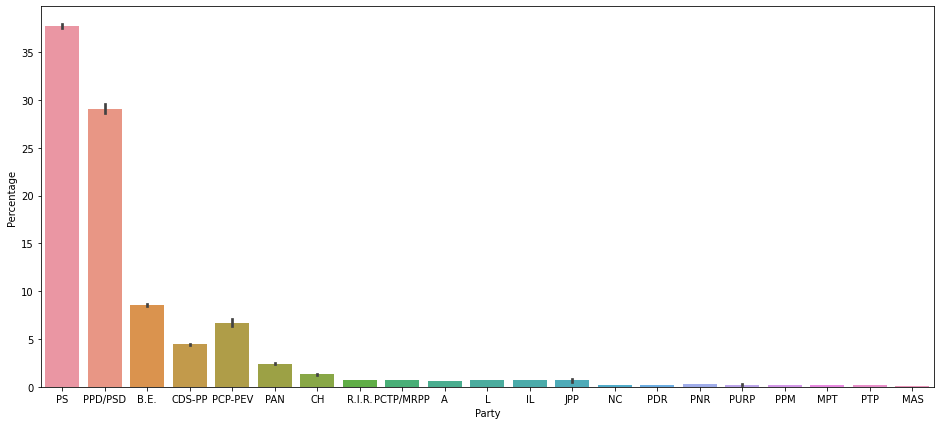

In [35]:
fig, ax= plt.subplots(figsize=(16,7))
ax=sns.barplot(x='Party', y='Percentage', data=df_port)
plt.show()

The percentage of votes recieved by Party PS , PPD/PSD and B.E with 38%, 28% and 8% respetively. The Partys CDS-PP , PCP-PEV are around 5%. But all other partys in the sate received below 5% of Votes.

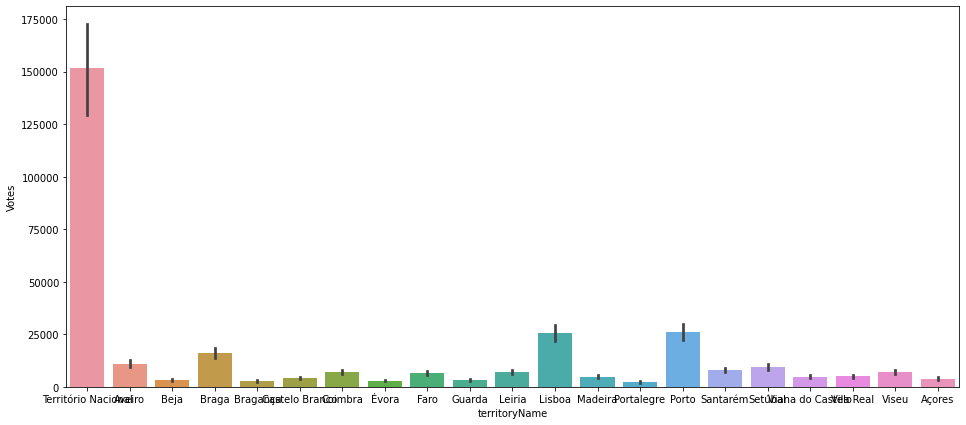

In [36]:
fig, ax= plt.subplots(figsize=(16,7))
ax=sns.barplot(x='territoryName', y='Votes', data=df_port)
plt.show()

From the above chart, we can conclude majority of voters from the Territorio Nacional Where almost 150000 voters. second Majority of Votes from district Lisbo and Porto. We had below 20000 voters from all other districts.

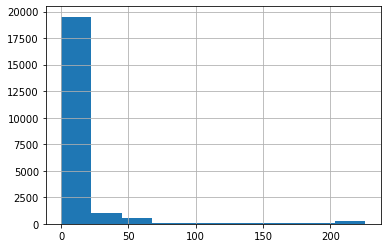

In [37]:
df_port['availableMandates'].hist()

Available Mandates are skewed towards right.

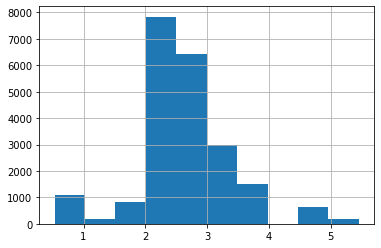

In [38]:
df_port['blankVotesPercentage'].hist()

Blank Votes Percentage is distributed Normally.

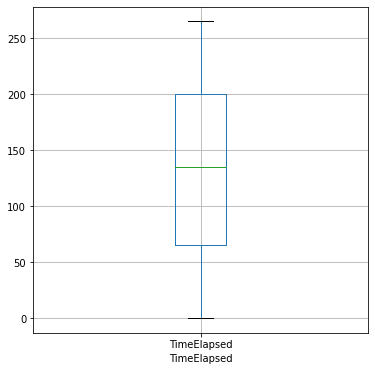

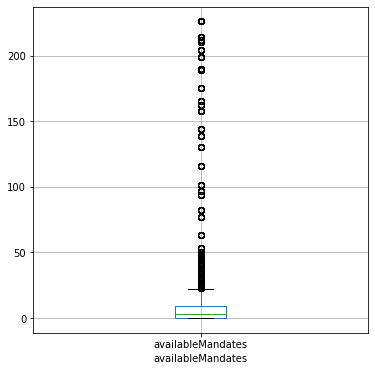

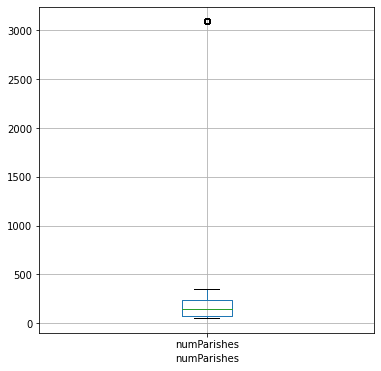

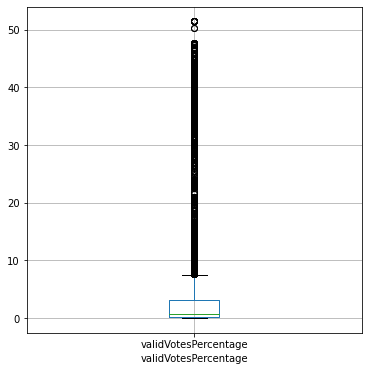

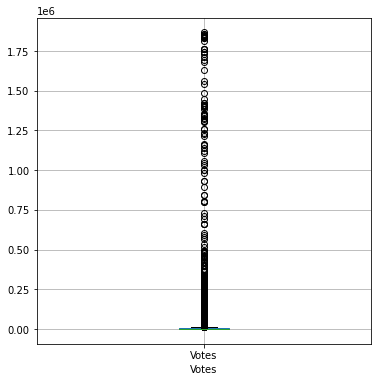

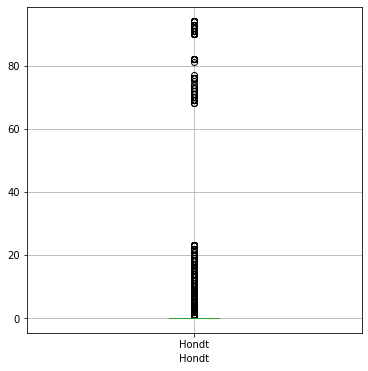

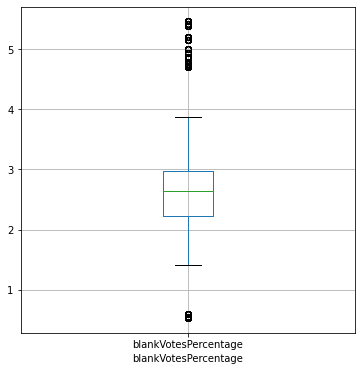

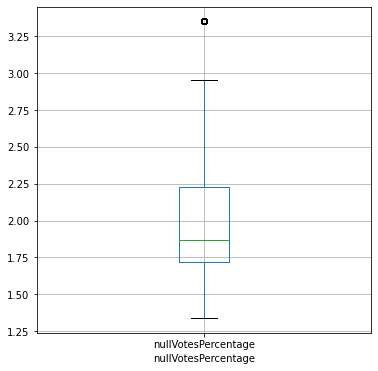

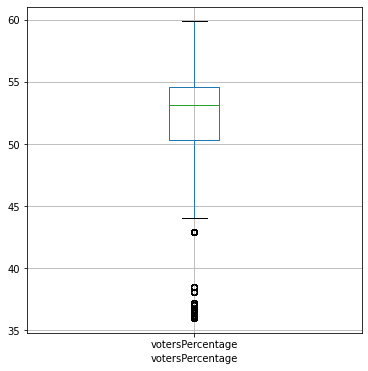

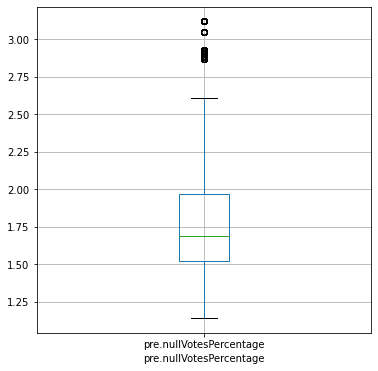

In [40]:
def box_func(dataset,lists):
    for i in lists:
        plt.figure(figsize = (6,6))
        dataset.boxplot(column=[i])
        plt.xlabel(i)
lis=['TimeElapsed','availableMandates','numParishes','validVotesPercentage','Votes','Hondt','blankVotesPercentage','nullVotesPercentage','votersPercentage','pre.nullVotesPercentage']
box_func(df_port,lis)

We can also observe from above boxplots that, there are many outliers in the dataset.